In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
import os
import matplotlib.dates as Date
import datetime

In [2]:
os.chdir(r'C:\Users\Nate P\Desktop\Rotten Tomatoes Movies Analysis\Disney Vs US Box Office')
# Domestic includes US AND CAN

In [3]:
"""1. Scrape 'the-numbers.com' for domestic box office totals from 1995 to 2019. Goal of project is to visualize Disney's ever 
increasing market share. But first, scrape information"""
the_numbers_request = requests.get('https://www.the-numbers.com/market/').text
the_numbers_soup = bs(the_numbers_request)
the_numbers_soup

<!DOCTYPE html>

<html>
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins">
<meta content="initial-scale=1" name="viewport"/>
<meta content="Overall movie market summary for each 

In [4]:
"""1a. What did we pull with our soup? Lets take a look. Will explore table rows, table headers, etc"""
the_numbers_soup.find('table')
the_numbers_annual_tix_table = the_numbers_soup.find('table')
"""There are multiple tables found at the URL. What to do? Extract only the first one, which we did in variable 
    'the_numbers_annual_tix_table'"""


"There are multiple tables found at the URL. What to do? Extract only the first one, which we did in variable \n    'the_numbers_annual_tix_table'"

In [5]:
"""1b. All the data available here! Check it out. Looping through the table rows. Now to put it in a list!"""
#for tr in the_numbers_annual_tix_table.findAll('tr'):
#    print(tr.text)
"""As usual, will create list of list. Each list will have one row of data"""
total_box_office_95_2019_data = [[td.text for td in tr.findAll('td')] for tr in the_numbers_annual_tix_table.findAll('tr')[1:]]
"""Create headers same way """
total_box_office_95_2019_data_headers = [th.text for th in the_numbers_annual_tix_table.findAll('tr')[0].findAll('th')]

In [6]:
#Simple check to ensure data secured
total_box_office_95_2019_data

[['2020', '1,063,481,835', '$9,688,319,514', '$9,688,319,514', '$9.11'],
 ['2019', '1,247,137,177', '$11,361,422,492', '$11,361,422,574', '$9.11'],
 ['2018', '1,311,256,847', '$11,945,552,389', '$11,945,552,568', '$9.11'],
 ['2017', '1,225,639,438', '$10,993,988,560', '$11,165,575,309', '$8.97'],
 ['2016', '1,301,658,904', '$11,259,352,764', '$11,858,112,611', '$8.65'],
 ['2015', '1,323,266,320', '$11,155,138,079', '$12,054,956,180', '$8.43'],
 ['2014', '1,257,400,618', '$10,272,966,196', '$11,454,919,630', '$8.17'],
 ['2013', '1,339,168,926', '$10,887,446,341', '$12,199,828,924', '$8.13'],
 ['2012', '1,381,106,440', '$10,993,610,207', '$12,581,879,666', '$7.96'],
 ['2011', '1,282,891,721', '$10,173,333,767', '$11,687,143,588', '$7.93'],
 ['2010', '1,328,549,022', '$10,482,254,025', '$12,103,081,596', '$7.89'],
 ['2009', '1,418,567,388', '$10,639,257,284', '$12,923,123,576', '$7.50'],
 ['2008', '1,358,041,408', '$9,750,739,371', '$12,371,757,232', '$7.18'],
 ['2007', '1,420,036,680', '

In [7]:
#Simple check to ensure data secured
total_box_office_95_2019_data_headers

['Year',
 'Tickets Sold',
 'Total Box Office',
 'Total InflationAdjusted Box Office',
 'AverageTicket Price']

In [16]:
domestic_box_office = pd.DataFrame(total_box_office_95_2019_data)
domestic_box_office.columns = ['Year','Tickets Sold','Gross Box Office', 'Gross Inflation Adjusted Box Office','Average Ticket Price']
domestic_box_office.to_csv('domestic_box_office_df.csv', index = False)

In [12]:
domestic_box_office[['Year','Gross Inflation Adjusted Box Office']]

,Year,Gross Inflation Adjusted Box Office
0,2020,"$9,688,319,514"
1,2019,"$11,361,422,574"
2,2018,"$11,945,552,568"
3,2017,"$11,165,575,309"
4,2016,"$11,858,112,611"
5,2015,"$12,054,956,180"
6,2014,"$11,454,919,630"
7,2013,"$12,199,828,924"
8,2012,"$12,581,879,666"
9,2011,"$11,687,143,588"


In [8]:
for th in the_numbers_annual_tix_table.find('tr').findAll('th'):
    print(th.text)

Year
Tickets SoldTotal Box OfficeTotal InflationAdjusted Box OfficeAverageTicket Price
Total Box Office
Total InflationAdjusted Box Office
AverageTicket Price


### ISSUES WITH SCRAPING TABLE HEADERS! CONSIDER OPTIONS LATER

In [10]:
"""2. Scrape Disney specific box office data. Goal is to scrape identical features (columns) but for Disney
    Columns ARE similar. No information on 'Average Ticket Price' but not necessary"""
the_numbers_disney_request = requests.get('https://www.the-numbers.com/market/distributor/Walt-Disney').text
the_numbers_disney_soup = bs(the_numbers_disney_request)

In [11]:
"""2a. Table we want is second on url. Will extract by finding all tables, and extracting the second table"""
disney_table = the_numbers_disney_soup.findAll('table')[1] 

In [12]:
"""2b. Scrape table just as before. Issues will persist with table headers, will consider options in future."""
disney_data = [[td.text for td in tr.findAll('td')] for tr in disney_table.findAll('tr')[1:]]

In [13]:
# Ensuring print success
disney_data

[['1995',
  '38',
  '19.04%',
  '$1,012,034,105',
  '232,651,499',
  '$2,119,455,156',
  'Toy Story',
  '$150,148,222'],
 ['1996',
  '37',
  '20.76%',
  '$1,197,737,813',
  '270,981,385',
  '$2,468,640,417',
  'The Rock',
  '$134,069,511'],
 ['1997',
  '33',
  '13.93%',
  '$885,889,269',
  '193,004,183',
  '$1,758,268,107',
  'George Of The Jungle',
  '$105,263,257'],
 ['1998',
  '28',
  '16.38%',
  '$1,109,009,676',
  '236,462,602',
  '$2,154,174,304',
  'Armageddon',
  '$201,578,182'],
 ['1999',
  '30',
  '16.95%',
  '$1,244,033,523',
  '244,888,472',
  '$2,230,933,980',
  'The Sixth Sense',
  '$276,386,495'],
 ['2000',
  '28',
  '14.75%',
  '$1,111,156,845',
  '206,151,531',
  '$1,878,040,447',
  'Dinosaur',
  '$137,748,063'],
 ['2001',
  '19',
  '10.79%',
  '$901,680,342',
  '159,307,472',
  '$1,451,291,070',
  'Monsters, Inc.',
  '$244,638,458'],
 ['2002',
  '28',
  '12.83%',
  '$1,175,098,032',
  '202,254,380',
  '$1,842,537,402',
  'Signs',
  '$227,750,028'],
 ['2003',
  '31',
 

In [14]:
#Create DataFrame. Typing Columns out by hand. Do not want to mess with scraping. 
disney_df = pd.DataFrame(disney_data)

In [15]:
disney_df.columns = ['Year','Movies in Release','Market Share','Gross','Tickets Sold','Inflation-Adjusted Gross','Top-Grossing Movie',
                    'Top Movie Gross']
disney_df.head()

,Year,Movies in Release,Market Share,Gross,Tickets Sold,Inflation-Adjusted Gross,Top-Grossing Movie,Top Movie Gross
0,1995,38,19.04%,"$1,012,034,105","232,651,499","$2,119,455,156",Toy Story,"$150,148,222"
1,1996,37,20.76%,"$1,197,737,813","270,981,385","$2,468,640,417",The Rock,"$134,069,511"
2,1997,33,13.93%,"$885,889,269","193,004,183","$1,758,268,107",George Of The Jungle,"$105,263,257"
3,1998,28,16.38%,"$1,109,009,676","236,462,602","$2,154,174,304",Armageddon,"$201,578,182"
4,1999,30,16.95%,"$1,244,033,523","244,888,472","$2,230,933,980",The Sixth Sense,"$276,386,495"


In [16]:
domestic_box_office.head()

,Year,Tickets Sold,Gross Box Office,Gross Inflation Adjusted Box Office,Average Ticket Price
0,2020,"1,063,481,835","$9,688,319,514","$9,688,319,514",$9.11
1,2019,"1,247,136,897","$11,361,419,930","$11,361,420,012",$9.11
2,2018,"1,311,256,847","$11,945,552,389","$11,945,552,568",$9.11
3,2017,"1,225,639,438","$10,993,988,560","$11,165,575,309",$8.97
4,2016,"1,301,658,904","$11,259,352,764","$11,858,112,611",$8.65


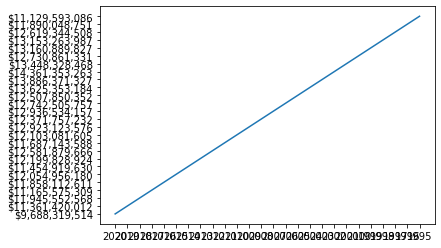

In [17]:
"""3. Construct two graphs. One graph is a time series comparing inflation adjusted gross from 1995 to 2019 to Disney
    inflation-adjusted gross. The hope is to visualize disneys ever increasing market share.
    Initially, my graph was not working. Why?? Because I am assuming what I'm plotting are numbers. They are not!!! Need to be 
    converted to integers"""
fig, ax = plt.subplots()
ax.plot(domestic_box_office['Year'],domestic_box_office['Gross Inflation Adjusted Box Office'])

In [18]:
"""3a. Fixing information in the domestic/Disney DataFrame. Need to fix year (to be a date) and Gross Inflation Adjusted. Start with Gross inflation adjusted"""
def int_convert(value):
    value_temp = value.strip('$').replace(',','')
    return int(value_temp)
domestic_gross_inflation_int = domestic_box_office['Gross Inflation Adjusted Box Office'].apply(int_convert)
disney_gross_inflation_int = disney_df['Inflation-Adjusted Gross'].apply(int_convert)

In [19]:
"""3a. Fixing information in domestic/Disney DataFrame. Fixing Year"""
domestic_box_office_year_date = pd.to_datetime(domestic_box_office['Year'])
disney_year_date = pd.to_datetime(disney_df['Year'])

C:\Users\Nate P\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


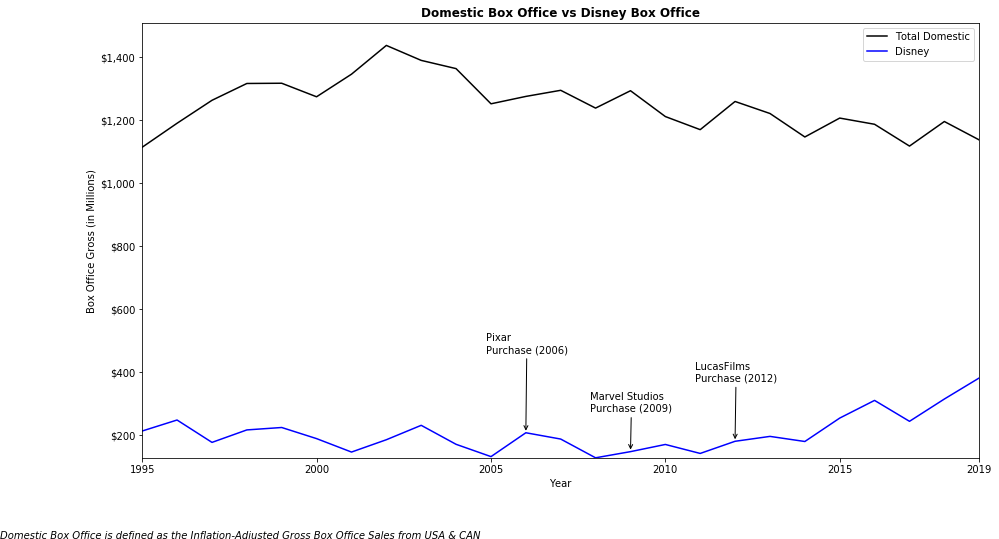

<Figure size 1080x576 with 0 Axes>

"\n1. Change color of lines\n2. Annotate text (Point to key points in Disney's slow domination. Pixar, Marvel, Lucas Films)\n3. Annotate key points with text box???\n"

In [20]:
""" Made a plot that compares US inflation adjusted gross vs Disney. Notice Disney's share rises as Domestic seesaws back and forth.
Disney much steadier."""
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.plot(domestic_box_office_year_date, domestic_gross_inflation_int, color = 'k', label = 'Total Domestic')
ax.plot(disney_year_date[:-1], disney_gross_inflation_int[:-1], color = 'b', label = 'Disney')
ax.set(xlabel = 'Year',ylabel = 'Box Office Gross (in Millions)')
ax.set_ylim([min(disney_gross_inflation_int[:-1]),15075912279])
# Why the weird floating point numbers? Has to do with how Matplotlib handles dates. Matplotlib converts dates to floating point. 
ax.set_xlim([728294.7,737060.0])
ax.set_yticklabels(['$0','$200','$400','$600','$800','$1,000','$1,200','$1,400'])
ax.set_xticks(['1995','2000','2005','2010','2015','2019'])
ax.set_xticklabels(['1995','2000','2005','2010','2015','2019'])
ax.annotate(s = 'Marvel Studios\nPurchase (2009)', 
            xy = (Date.date2num(datetime.date(2009,1,1)),
            disney_df[disney_df['Year'] == '2009']['Inflation-Adjusted Gross'].apply(int_convert)),
           xytext = (-40, 40), 
            textcoords = 'offset points',
            arrowprops = {'arrowstyle':'->'})
ax.annotate(s = 'Pixar\nPurchase (2006)',
            xy = (Date.date2num(datetime.date(2006,1,1)), disney_df[disney_df['Year'] == '2006']['Inflation-Adjusted Gross'].apply(int_convert)),
           xytext = (-40,80),
           textcoords = 'offset points',
           arrowprops = {'arrowstyle':'->'})
ax.annotate(s = 'LucasFilms\nPurchase (2012)',
           xy = (Date.date2num(datetime.date(2012,1,1)), disney_df[disney_df['Year'] == '2012']['Inflation-Adjusted Gross'].apply(int_convert)),
           xytext = (-40, 60),
           textcoords = 'offset points',
           arrowprops = {'arrowstyle':'->'})
ax.set_title('Domestic Box Office vs Disney Box Office', fontweight = 'bold')
ax.annotate(s = 'Domestic Box Office is defined as the Inflation-Adjusted Gross Box Office Sales from USA & CAN', 
            fontstyle = 'italic',
            fontsize = 10,
            xy = (0,0), 
            xycoords = 'figure fraction',
           xytext =  (0,0), textcoords = 'offset points')
ax.legend()
plt.figure(figsize = (15,8))
plt.show()
# Graph disappointing. How can we fix? Not as explosive as would have liked. Need to cut off space on y-axis. 
#Change colors, change y tick labels, etc. 

## NEXT STEPS: 
"""
1. Change color of lines
2. Annotate text (Point to key points in Disney's slow domination. Pixar, Marvel, Lucas Films)
3. Annotate key points with text box???
"""


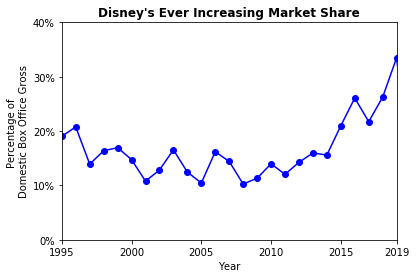

In [21]:
"""Create a graph showing Disney's growth in % over time"""
market_share_integer = disney_df['Market Share'].apply(lambda x: float(x.strip('%')))
fig, ax = plt.subplots()
ax.plot(disney_year_date, market_share_integer, color = 'b', marker = 'o')
ax.set_xlim(Date.date2num(datetime.date(1995,1,1)),Date.date2num(datetime.date(2019,1,1)))
ax.set_xticks(['1995','2000','2005','2010','2015','2019'])
ax.set_xticklabels(['1995','2000','2005','2010','2015','2019'])
ax.set_xlabel('Year')
ax.set_ylim(0,40)
ax.set_yticks([0,10,20,30,40])
ax.set_yticklabels(['0%','10%','20%','30%','40%'])
ax.set_ylabel('Percentage of \nDomestic Box Office Gross')
ax.set_title('Disney\'s Ever Increasing Market Share', fontweight = 'bold')
plt.show()

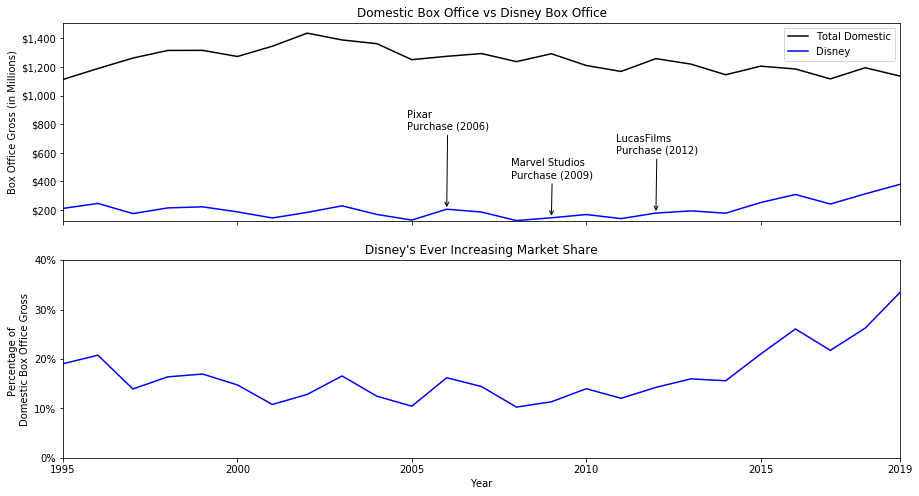

<Figure size 1080x576 with 0 Axes>

In [22]:
"""Combining both graphs"""
fig, (ax, ax1) = plt.subplots(2,1, sharex = True)
fig.set_size_inches(15,8)
ax.plot(domestic_box_office_year_date, domestic_gross_inflation_int, color = 'k', label = 'Total Domestic')
ax.plot(disney_year_date[:-1], disney_gross_inflation_int[:-1], color = 'b', label = 'Disney')
ax.set(ylabel = 'Box Office Gross (in Millions)')
ax.set_ylim([min(disney_gross_inflation_int[:-1]),15075912279])
# Why the weird floating point numbers? Has to do with how Matplotlib handles dates. Matplotlib converts dates to floating point. 
ax.set_xlim([728294.7,737060.0])
ax.set_yticklabels(['$0','$200','$400','$600','$800','$1,000','$1,200','$1,400'])
ax.set_xticks(['1995','2000','2005','2010','2015','2019'])
ax.set_xticklabels(['1995','2000','2005','2010','2015','2019'])
ax.annotate(s = 'Marvel Studios\nPurchase (2009)', 
            xy = (Date.date2num(datetime.date(2009,1,1)),
            disney_df[disney_df['Year'] == '2009']['Inflation-Adjusted Gross'].apply(int_convert)),
           xytext = (-40, 40), 
            textcoords = 'offset points',
            arrowprops = {'arrowstyle':'->'})
ax.annotate(s = 'Pixar\nPurchase (2006)',
            xy = (Date.date2num(datetime.date(2006,1,1)), disney_df[disney_df['Year'] == '2006']['Inflation-Adjusted Gross'].apply(int_convert)),
           xytext = (-40,80),
           textcoords = 'offset points',
           arrowprops = {'arrowstyle':'->'})
ax.annotate(s = 'LucasFilms\nPurchase (2012)',
           xy = (Date.date2num(datetime.date(2012,1,1)), disney_df[disney_df['Year'] == '2012']['Inflation-Adjusted Gross'].apply(int_convert)),
           xytext = (-40, 60),
           textcoords = 'offset points',
           arrowprops = {'arrowstyle':'->'})
ax.set_title('Domestic Box Office vs Disney Box Office')
ax.legend()
ax1.plot(disney_year_date, market_share_integer, color = 'b')
ax1.set_xlim(Date.date2num(datetime.date(1995,1,1)),Date.date2num(datetime.date(2019,1,1)))
ax1.set_xticks(['1995','2000','2005','2010','2015','2019'])
ax1.set_xticklabels(['1995','2000','2005','2010','2015','2019'])
ax1.set_xlabel('Year')
ax1.set_ylim(0,40)
ax1.set_yticks([0,10,20,30,40])
ax1.set_yticklabels(['0%','10%','20%','30%','40%'])
ax1.set_ylabel('Percentage of \nDomestic Box Office Gross')
ax1.set_title('Disney\'s Ever Increasing Market Share')
plt.figure(figsize = (15,8))
#fig.savefig('disney_box_office.png')
plt.show()

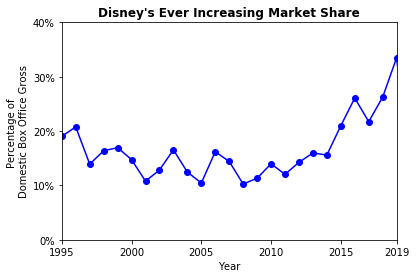

In [24]:
# Shifting Focus to Disney increasing market share. Jon suggested adding other companies. I like this idea.
"""Create a graph showing Disney's growth in % over time"""
market_share_integer = disney_df['Market Share'].apply(lambda x: float(x.strip('%')))
fig, ax = plt.subplots()
ax.plot(disney_year_date, market_share_integer, color = 'b', marker = 'o')
ax.set_xlim(Date.date2num(datetime.date(1995,1,1)),Date.date2num(datetime.date(2019,1,1)))
ax.set_xticks(['1995','2000','2005','2010','2015','2019'])
ax.set_xticklabels(['1995','2000','2005','2010','2015','2019'])
ax.set_xlabel('Year')
ax.set_ylim(0,40)
ax.set_yticks([0,10,20,30,40])
ax.set_yticklabels(['0%','10%','20%','30%','40%'])
ax.set_ylabel('Percentage of \nDomestic Box Office Gross')
ax.set_title('Disney\'s Ever Increasing Market Share', fontweight = 'bold')
plt.show()

In [25]:
# Scrape Universal, Warner Bros, Paramount
# Write a function that will scrape the information needed
def scrape_distributor_data(distributer_name):
    """Function scrapes distributer data from 'the-numbers' website. Input is distributer name, which will be formated correctly 
    with the url. Return is dataframe of 8 columns."""
    
    distributer_url = 'https://www.the-numbers.com/market/distributor/{}'.format(distributer_name.replace(' ','-'))
    distributer_requests = requests.get(distributer_url).text
    distributer_soup = bs(distributer_requests)
    # Multiple tables on url. Select second one
    distributer_table = distributer_soup.findAll('table')[1] 
    # Extract data
    distributer_data = [[td.text for td in tr.findAll('td')] for tr in distributer_table.findAll('tr')[1:]]
    distributer_df = pd.DataFrame(distributer_data)
   
    # Column names are uniform. Cannot scrape column names due to issue with website
    distributer_df.columns = ['Year','Movies in Release','Market Share','Gross','Tickets Sold','Inflation-Adjusted Gross','Top-Grossing Movie',
                    'Top Movie Gross']
    
    return distributer_df
    


In [28]:
# Scrape each distributer df (top five, excluding Disney) and save their dataframe. 
warner_bros_df = scrape_distributor_data('Warner Bros')
sony_df = scrape_distributor_data('Sony Pictures')
universal_df = scrape_distributor_data('Universal')
twentieth_century_fox_df = scrape_distributor_data('20th Century Fox')





In [29]:
warner_bros_df.head()

,Year,Movies in Release,Market Share,Gross,Tickets Sold,Inflation-Adjusted Gross,Top-Grossing Movie,Top Movie Gross
0,1995,31,16.31%,"$866,884,482","199,283,775","$1,815,475,190",Batman Forever,"$184,031,112"
1,1996,29,15.77%,"$909,761,563","205,828,394","$1,875,096,669",Twister,"$241,688,385"
2,1997,30,10.55%,"$670,912,791","146,168,351","$1,331,593,678",Batman & Robin,"$107,325,195"
3,1998,31,11.20%,"$758,468,077","161,720,256","$1,473,271,532",Lethal Weapon 4,"$130,444,603"
4,1999,25,14.21%,"$1,042,641,425","205,244,361","$1,869,776,129",The Matrix,"$171,383,253"


In [30]:
sony_df.head()

,Year,Movies in Release,Market Share,Gross,Tickets Sold,Inflation-Adjusted Gross,Top-Grossing Movie,Top Movie Gross
0,1995,31,12.84%,"$682,169,140","156,820,477","$1,428,634,545",Legends of the Fall,"$66,020,491"
1,1996,39,10.63%,"$613,455,899","138,790,908","$1,264,385,172",Jerry Maguire,"$83,338,125"
2,1997,36,19.96%,"$1,269,256,493","276,526,450","$2,519,155,960",Men in Black,"$250,650,052"
3,1998,37,10.11%,"$684,267,457","145,899,229","$1,329,141,976",Godzilla,"$136,314,294"
4,1999,37,8.70%,"$638,293,197","125,648,250","$1,144,655,558",Big Daddy,"$163,479,795"


In [31]:
universal_df.head()

,Year,Movies in Release,Market Share,Gross,Tickets Sold,Inflation-Adjusted Gross,Top-Grossing Movie,Top Movie Gross
0,1995,21,12.54%,"$666,656,425","153,254,338","$1,396,147,019",Apollo 13,"$172,036,360"
1,1996,18,8.36%,"$482,379,703","109,135,672","$994,225,972",The Nutty Professor,"$128,814,019"
2,1997,13,9.67%,"$614,947,075","133,975,392","$1,220,515,821",The Lost World: Jurassic Park,"$229,086,679"
3,1998,19,5.92%,"$400,605,109","85,416,858","$778,147,576",Patch Adams,"$65,495,000"
4,1999,23,12.73%,"$934,514,419","183,959,519","$1,675,871,218",The Mummy,"$155,385,488"


In [32]:
twentieth_century_fox_df.head()

,Year,Movies in Release,Market Share,Gross,Tickets Sold,Inflation-Adjusted Gross,Top-Grossing Movie,Top Movie Gross
0,1995,15,7.73%,"$410,787,635","94,433,933","$860,293,130",Die Hard: With a Vengeance,"$100,012,499"
1,1996,15,12.67%,"$730,976,224","165,379,228","$1,506,604,767",Independence Day,"$306,169,255"
2,1997,21,10.13%,"$644,398,839","140,391,895","$1,278,970,163",Star Wars Ep. IV: A New Hope,"$138,133,173"
3,1998,19,10.78%,"$729,639,504","155,573,445","$1,417,274,084",There's Something About Mary,"$174,711,965"
4,1999,23,10.91%,"$800,943,593","157,666,048","$1,436,337,697",Star Wars Ep. I: The Phanto…,"$430,443,350"


In [13]:
warner_bros_df.to_csv('warner_bros_df.csv', index = False)
sony_df.to_csv('sony_df.csv', index = False)
universal_df.to_csv('universal_df.csv', index = False)
twentieth_century_fox_df.to_csv('twentieth_century_fox_df.csv', index = False)
disney_df.to_csv('disney_df.csv', index = False)

NameError: name 'warner_bros_df' is not defined

In [14]:
disney_df.to_csv('disney_df.csv', index = False)

NameError: name 'disney_df' is not defined